In [1]:
import sys
import pygmo as pg

In [2]:
sys.path.append('flyby')
from flyby import flyby

In [3]:
p = flyby(['earth', 'venus', 'mars', 'earth'],
          [36569, 10, 10, 10], 
          [365, 1000, 1000, 1000], ignore_last=True, days=1, multi_revs=2)

In [4]:
algo = pg.algorithm(pg.de1220(gen=10))
algo.set_verbosity(10)
archi = pg.archipelago(n=2, algo=algo, t=pg.topology(pg.ring(w=0.1)), prob=pg.problem(p), pop_size=100)
archi.evolve(1000)
archi.wait_check()

Date of    earth departue :  1959-Jun-14 01:04:03.419925
Date of    venus encounter:  1959-Sep-23 18:13:46.022832
Date of     mars encounter:  1961-Oct-10 05:19:55.534867
Date of    earth arrival  :  1963-Jul-24 17:35:06.762435

Transfer time from    earth to    venus: 101.7150764225371  days
Transfer time from    venus to     mars: 747.4626100929963  days
Transfer time from     mars to    earth: 652.5105466153764  days
Total mission duration:                  1501.6882331309098  days


TransX escape plan -     earth escape
MJD:                  36733.04448403 
Prograde:             -3305.6392 m/s
Outward:               -389.7044 m/s
Plane:                 1471.3817 m/s
Hyp. excess velocity:  3639.2423 m/s
   earth escape burn:  3790.2916 m/s
------------------GMAT------------------
GMAT TDBModJulian:     6733.544484026905
GMAT OutgoingC3:       13.244084162848328
GMAT OutgoingRHA:      165.7635063632964
GMAT OutgoingDHA:      -23.84660215427592

   venus encounter
MJD:                

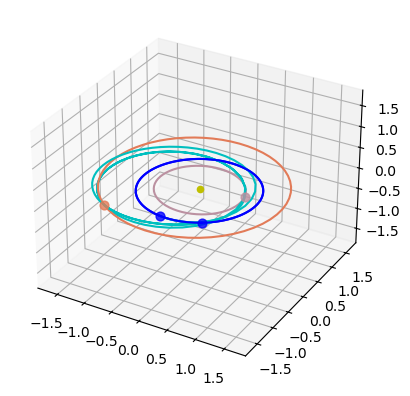

In [5]:
sols = archi.get_champions_f()
idx = sols.index(min(sols))
p.fitness(archi.get_champions_x()[idx])
p.print_transx()
p.plot_trajectory()

In [6]:
# archi.get_migration_log()

In [7]:
print(archi.get_champions_f())
print(archi)

[array([3790.29161935]), array([3790.29161935])]
Number of islands: 2
Topology: Ring
Migration type: point-to-point
Migrant handling policy: preserve
Status: idle

Islands summaries:

	#  Type                    Algo                                                  Prob   Size  Status  
	------------------------------------------------------------------------------------------------------
	0  Multiprocessing island  sa-DE1220: Self-adaptive Differential Evolution 1220  Flyby  100   idle    
	1  Multiprocessing island  sa-DE1220: Self-adaptive Differential Evolution 1220  Flyby  100   idle    

